In [2]:
import pandas as pd

<ipython-input-2-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path = "creditcard_dataset.csv"
data = pd.read_csv(file_path)

In [4]:
data.head()

,Time,Amount,Class,Merchant_Type,Transaction_Channel,Cardholder_Age,Transaction_Location,Transaction_History,Timestamp,Hour
0,79971,101.908163,0,travel,online,53,international,345.721081,2023-01-01 12:43:00,9
1,55556,241.486077,0,grocery,in-store,42,international,177.794562,2023-01-01 13:16:00,10
2,164832,460.900153,0,health,online,40,international,217.946929,2023-01-01 19:34:00,10
3,38192,157.301678,0,electronics,in-store,47,international,496.816517,2023-01-01 13:36:00,13
4,135453,66.656487,0,travel,in-store,45,international,153.470059,2023-01-01 10:10:00,18


In [5]:
data.shape

(125913, 10)

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

Time                    0
Amount                  0
Class                   0
Merchant_Type           0
Transaction_Channel     0
Cardholder_Age          0
Transaction_Location    0
Transaction_History     0
Timestamp               0
Hour                    0
dtype: int64


In [7]:
data.duplicated().sum()

345

In [8]:
data_cleaned = data.drop_duplicates()

In [9]:
data_cleaned.shape

(125568, 10)

In [10]:
data_cleaned.dtypes

Time                      int64
Amount                  float64
Class                     int64
Merchant_Type            object
Transaction_Channel      object
Cardholder_Age            int64
Transaction_Location     object
Transaction_History     float64
Timestamp                object
Hour                      int64
dtype: object

In [11]:
round(data_cleaned.describe())

,Time,Amount,Class,Cardholder_Age,Transaction_History,Hour
count,125568.0,125568.0,125568.0,125568.0,125568.0,125568.0
mean,85926.0,232.0,0.0,42.0,276.0,13.0
std,49724.0,148.0,0.0,9.0,130.0,4.0
min,2.0,1.0,0.0,16.0,50.0,0.0
25%,42754.0,95.0,0.0,39.0,164.0,11.0
50%,86024.0,225.0,0.0,44.0,277.0,13.0
75%,128807.0,362.0,0.0,47.0,389.0,16.0
max,172798.0,500.0,1.0,65.0,500.0,23.0


In [12]:
class_dist = data_cleaned['Class'].value_counts(normalize=True) * 100
print(class_dist)

Class
0    89.246464
1    10.753536
Name: proportion, dtype: float64


In [13]:
median_age_fraud = data_cleaned[data_cleaned['Class'] == 1]['Cardholder_Age'].median()
median_age_non_fraud = data_cleaned[data_cleaned['Class'] == 0]['Cardholder_Age'].median()

print(median_age_fraud)
print(median_age_non_fraud)

19.0
44.0


In [14]:
%pip install seaborn

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

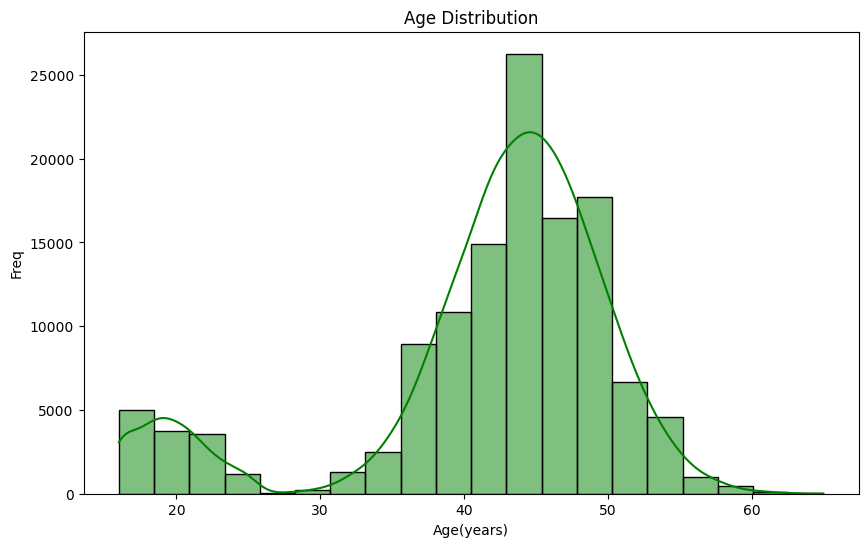

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Cardholder_Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel("Age(years)")
plt.ylabel("Freq")
plt.show()

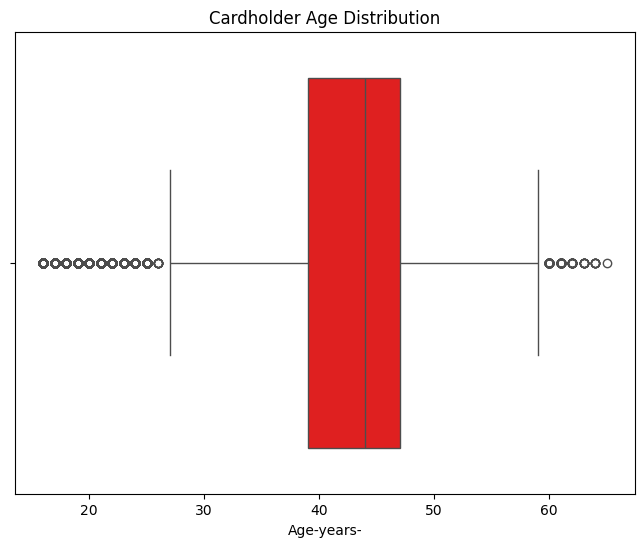

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Cardholder_Age'], color = 'red')
plt.title('Cardholder Age Distribution')
plt.xlabel('Age-years-')
plt.show()

In [18]:
data[['Amount','Cardholder_Age']].describe()

,Amount,Cardholder_Age
count,125913.000000,125913.000000
mean,231.869543,41.751884
std,148.523286,9.146422
min,1.264653,16.000000
25%,94.210801,39.000000
50%,223.802733,44.000000
75%,361.767190,47.000000
max,499.999935,65.000000


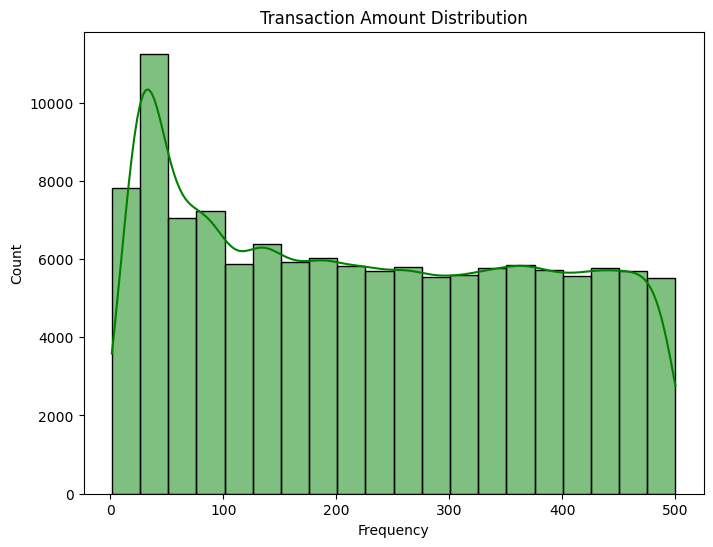

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(data['Amount'], bins=20, kde=True, color='green')
plt.title('Transaction Amount Distribution')
plt.xlabel('Frequency')
plt.show()

<ipython-input-20-40f17186ee6b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Merchant_Type", data=data , palette ='coolwarm')


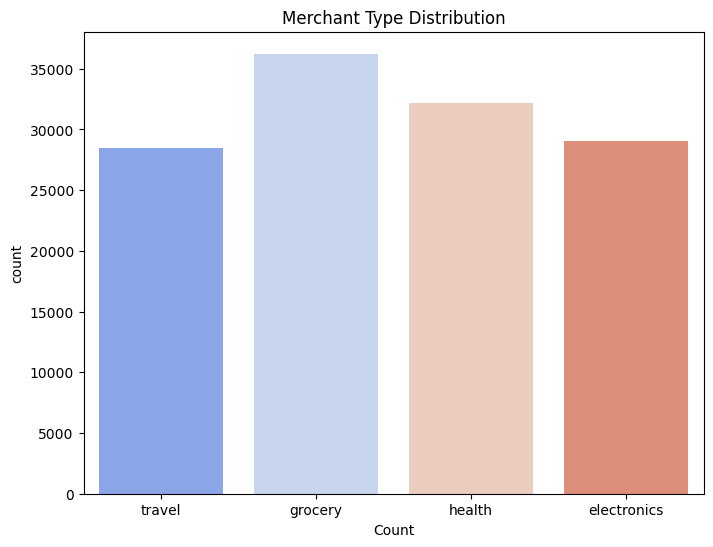

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="Merchant_Type", data=data , palette ='coolwarm')
plt.title('Merchant Type Distribution')
plt.xlabel('Count')
plt.show()

In [21]:
channel_loc_counts = data.groupby(['Transaction_Channel','Transaction_Location']).size().unstack()
print(channel_loc_counts)

Transaction_Location  international  local
Transaction_Channel                       
in-store                      29854  28781
online                        35864  31414


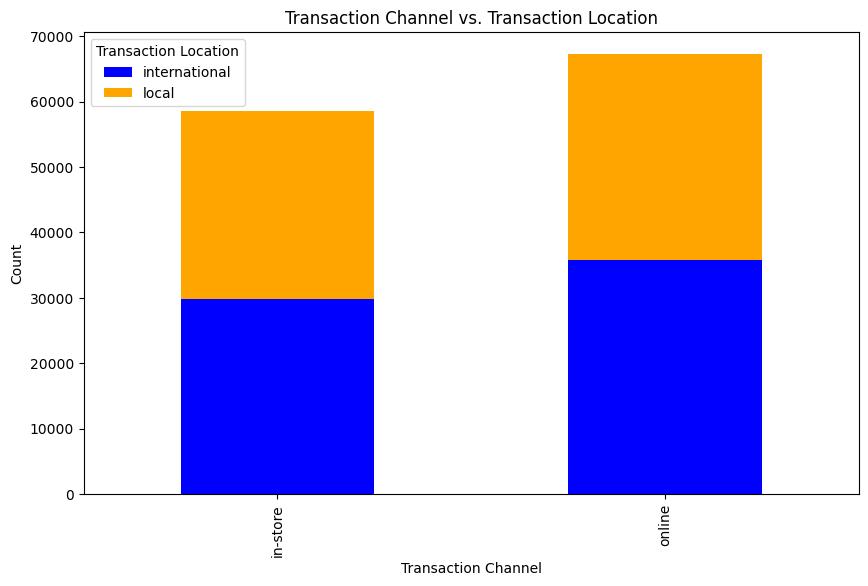

In [22]:
channel_loc_counts.plot(kind='bar' , stacked=True , figsize=(10,6) , color=['blue' , 'orange'])
plt.title('Transaction Channel vs. Transaction Location')
plt.xlabel('Transaction Channel')
plt.ylabel('Count')
plt.legend(title="Transaction Location")
plt.show()

################################################################################################################

How can we identify patterns in fraudulent transactions based on transaction amount, time of day, and merchant type?

In [23]:
amount_stats_by_class = data.groupby('Class')['Amount'].describe()

fraud_hourly_counts = data[data['Class'] == 1].groupby('Hour').size()
fraud_merchants_counts = data[data['Class'] == 1]['Merchant_Type'].value_counts()

print(amount_stats_by_class)
print(fraud_hourly_counts)
print(fraud_merchants_counts)

          count        mean         std       min         25%         50%  \
Class                                                                       
0      112169.0  254.295566  141.247199  5.344981  132.110808  253.725088   
1       13744.0   48.843885   40.785612  1.264653   23.281589   34.222710   

              75%         max  
Class                          
0      376.286131  499.999935  
1       66.502691  192.522225  
Hour
0     1127
1     1027
2     1327
3     1257
4      955
5     1239
22    3398
23    3414
dtype: int64
Merchant_Type
grocery        7922
health         4023
electronics    1220
travel          579
Name: count, dtype: int64


In [24]:
%pip install numpy

In [25]:
import numpy as np

In [26]:
fraud_amounts = data[data['Class'] == 1]['Amount'].values
fraud_mean = np.mean(fraud_amounts)
fraud_median = np.median(fraud_amounts)
fraud_90th_perc = np.percentile(fraud_amounts,90)

fraud_hourly_avg = data[data['Class'] == 1].groupby('Hour')['Amount'].mean()
peak_fraud_hour = fraud_hourly_avg.idxmax()
peak_amount_per_hour = fraud_hourly_avg.max()
print(fraud_hourly_avg)
print(peak_fraud_hour)
print(peak_amount_per_hour)
print(fraud_mean , fraud_median , fraud_90th_perc)

Hour
0     50.558682
1     47.882746
2     47.982203
3     48.335748
4     50.656185
5     48.415311
22    49.519676
23    48.064919
Name: Amount, dtype: float64
4
50.65618544209631
48.84388491948421 34.222709904287484 96.81536361065


<ipython-input-27-99c4e794545a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='Amount', palette='coolwarm')
<ipython-input-27-99c4e794545a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_hourly_counts.index, y=fraud_hourly_counts.values, palette='Reds')
<ipython-input-27-99c4e794545a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_merchants_counts.index, y=fraud_merchants_counts.values, palette='Blues')


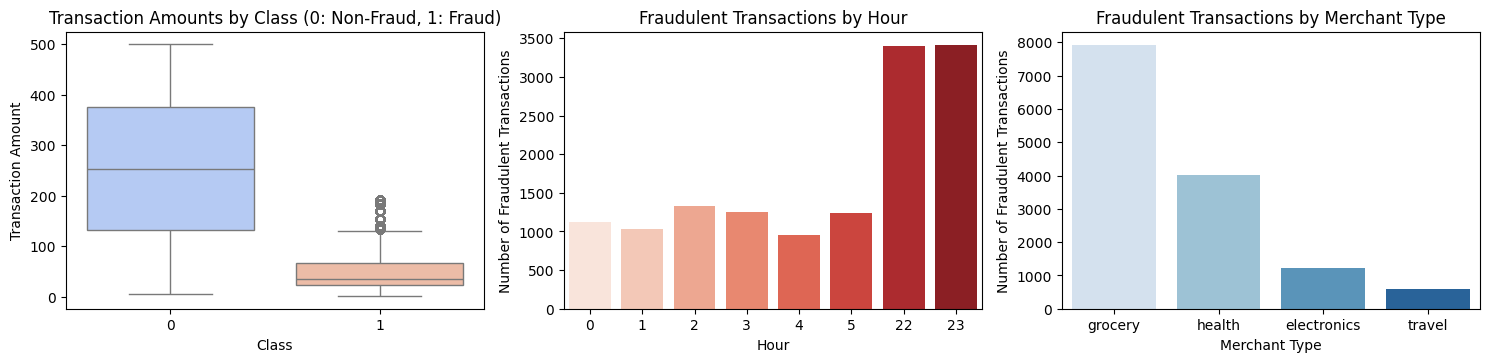

In [27]:
# Step 3: Visualizations
plt.figure(figsize=(15, 10))

# Boxplot for Transaction Amounts by Class
plt.subplot(3, 3, 1)
sns.boxplot(data=data, x='Class', y='Amount', palette='coolwarm')
plt.title('Transaction Amounts by Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')

# Barplot for Hourly Fraud Distribution
plt.subplot(3, 3, 2)
sns.barplot(x=fraud_hourly_counts.index, y=fraud_hourly_counts.values, palette='Reds')
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Fraudulent Transactions')

# Barplot for Merchant Types
plt.subplot(3, 3, 3)
sns.barplot(x=fraud_merchants_counts.index, y=fraud_merchants_counts.values, palette='Blues')
plt.title('Fraudulent Transactions by Merchant Type')
plt.xlabel('Merchant Type')
plt.ylabel('Number of Fraudulent Transactions')

# Show the plots
plt.tight_layout()
plt.show()

Which transaction channels (online/in-store) and locations (local/international) are more prone to fraud?

In [28]:
channel_counts = data.groupby(['Transaction_Channel','Class']).size().unstack()
location_counts = data.groupby(['Transaction_Location','Class']).size().unstack()

print(channel_counts)
print(location_counts)

Class                    0      1
Transaction_Channel              
in-store             55879   2756
online               56290  10988
Class                     0     1
Transaction_Location             
international         56054  9664
local                 56115  4080


In [29]:
fraud_rate_channel = channel_counts.loc[:,1] / channel_counts.sum(axis=1) * 100
fraud_rate_location = location_counts.loc[:,1] / location_counts.sum(axis=1) * 100

print(fraud_rate_channel)
print(fraud_rate_location)

Transaction_Channel
in-store     4.700264
online      16.332233
dtype: float64
Transaction_Location
international    14.705256
local             6.777972
dtype: float64


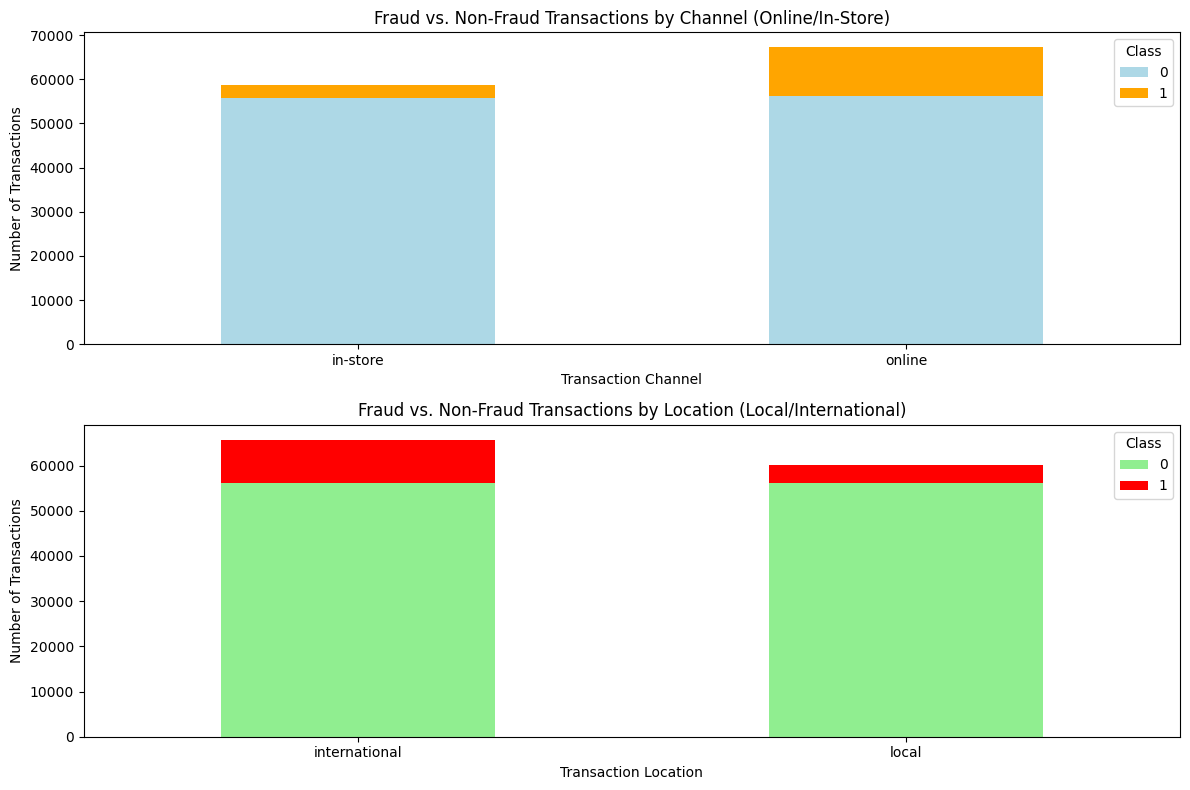

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

#figure 1
plt.subplot(2,1,1)
channel_counts.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], ax=plt.gca())
plt.title('Fraud vs. Non-Fraud Transactions by Channel (Online/In-Store)')
plt.xlabel('Transaction Channel')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

# figure 2
plt.subplot(2, 1, 2)
location_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'red'], ax=plt.gca())
plt.title('Fraud vs. Non-Fraud Transactions by Location (Local/International)')
plt.xlabel('Transaction Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

##############################################################

Question 3 : Are younger cardholders more likely to be invloved in fraud transactions compared to older cardholders ?

In [31]:
bins = [16, 25, 40, 60, 100]
labels = ['16-25', '26-40', '41-60' , '61+']
data['Age_bracket'] = pd.cut(data['Cardholder_Age'], bins=bins, labels=labels, right=True)

In [32]:
age_bracket_counts = data.groupby(['Age_bracket', 'Class']).size().unstack()
age_bracket_counts

<ipython-input-32-0af38fcdc816>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bracket_counts = data.groupby(['Age_bracket', 'Class']).size().unstack()


Class,0,1
Age_bracket,,
16-25,118,11785
26-40,23824,0
41-60,88132,0
61+,95,0


In [33]:
fraud_rate_age = (age_bracket_counts[1] / age_bracket_counts.sum(axis=1)) * 100
fraud_rate_age

Age_bracket
16-25    99.008653
26-40     0.000000
41-60     0.000000
61+       0.000000
dtype: float64

In [34]:
import numpy as np


fraud_ages = data[data['Class'] == 1]['Cardholder_Age'].values
mean_fraud_age = np.mean(fraud_ages)
median_fraud_age =np.median(fraud_ages)
print(mean_fraud_age)
print(median_fraud_age)

19.598661233993017
19.0


In [35]:
peak_fraud_age_bracket = fraud_rate_age.idxmax()
peak_fraud_rate = fraud_rate_age.max()

print(peak_fraud_age_bracket)
print(peak_fraud_rate)

16-25
99.00865328068555


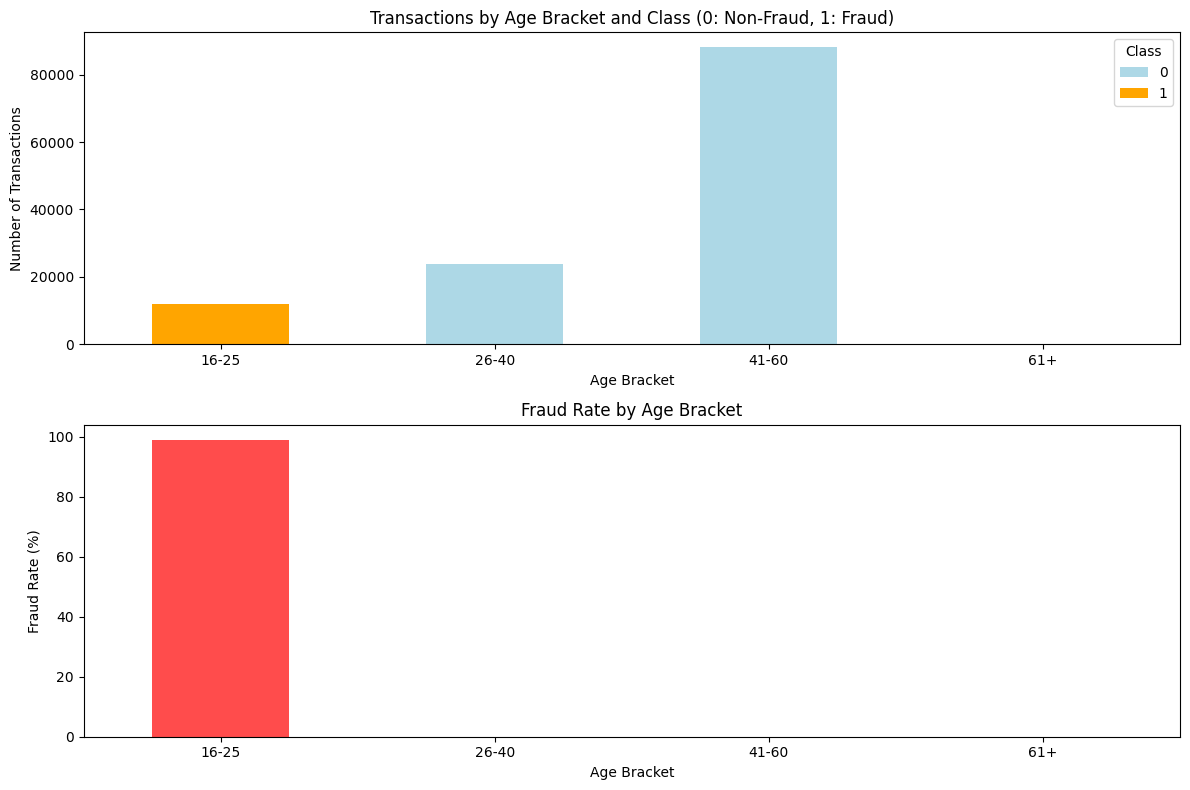

In [36]:
plt.figure(figsize=(12, 8))

# Barplot for Fraud and Non-Fraud by Age Bracket
plt.subplot(2, 1, 1)
age_bracket_counts.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], ax=plt.gca())
plt.title('Transactions by Age Bracket and Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

# Line Plot for Fraud Rate by Age Bracket
plt.subplot(2, 1, 2)
fraud_rate_age.plot(kind='bar', color='red', alpha=0.7)
plt.title('Fraud Rate by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

###############################################################################################################

How does transaction history differ between fraud and non-fraud cases?

In [37]:
history_stats_by_class = data.groupby('Class')['Transaction_History'].describe()
print(history_stats_by_class)

          count        mean         std        min         25%         50%  \
Class                                                                        
0      112169.0  300.250515  115.798348  51.410211  199.775206  301.125522   
1       13744.0   75.373511   14.140314  50.037720   63.500718   75.521582   

              75%         max  
Class                          
0      400.608744  499.993189  
1       87.893809   99.937643  


In [39]:
fraud_history = data[data['Class']==1]['Transaction_History'].values

fraud_25th_perc = np.percentile(fraud_history, 25)
fraud_median = np.percentile(fraud_history, 50)
fraud_75th_perc = np.percentile(fraud_history, 75)

non_fraud_history = data[data['Class'] == 0]['Transaction_History'].values
non_fraud_mean_history = np.mean(non_fraud_history)
fraud_mean_history = np.mean(fraud_history)
mean_history_diff = abs(fraud_mean_history - non_fraud_mean_history)

print(fraud_25th_perc)
print(fraud_median)
print(fraud_75th_perc)
print(non_fraud_mean_history)
print(fraud_mean_history)
print(mean_history_diff)

63.50071751532662
75.52158181877779
87.89380918212314
300.2505147952778
75.3735109266044
224.8770038686734


<ipython-input-40-1c986bc5dfde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='Transaction_History', palette='coolwarm')


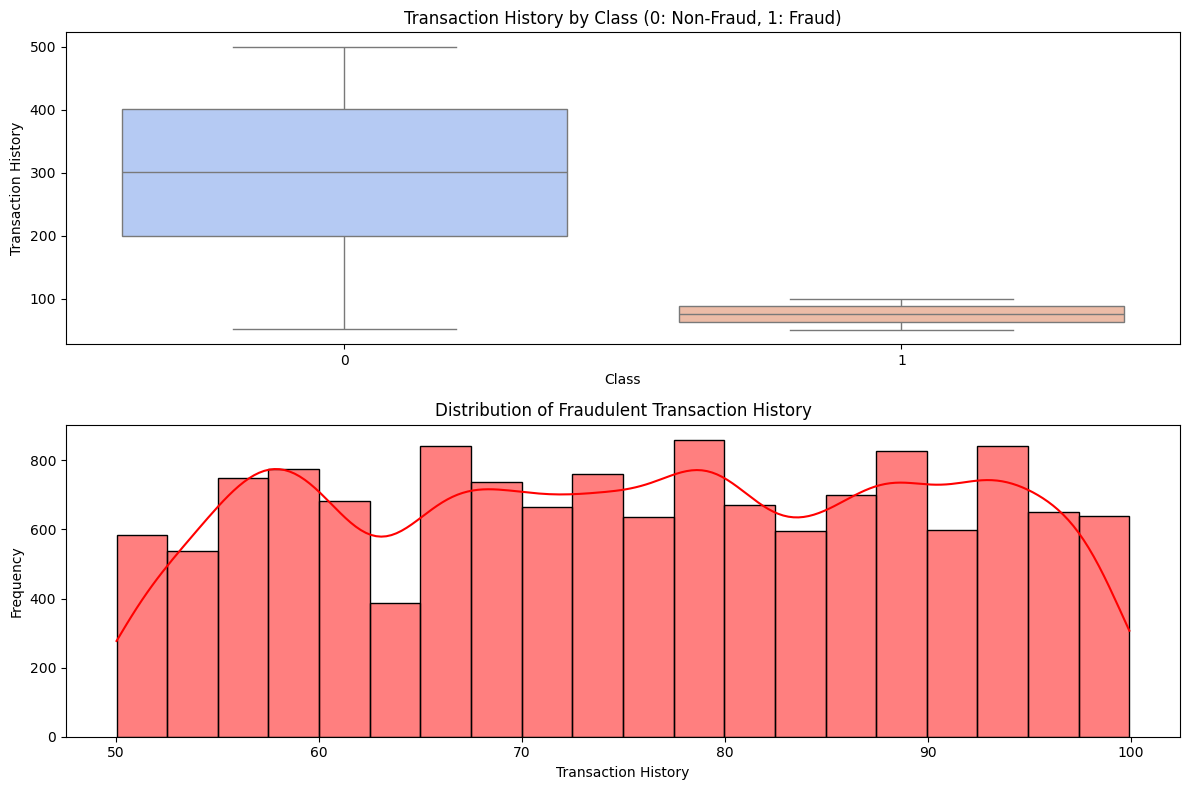

In [40]:
plt.figure(figsize=(12, 8))

# Boxplot for Transaction History
plt.subplot(2, 1, 1)
sns.boxplot(data=data, x='Class', y='Transaction_History', palette='coolwarm')
plt.title('Transaction History by Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction History')

# Histogram for Fraudulent Transaction History
plt.subplot(2, 1, 2)
sns.histplot(fraud_history, bins=20, kde=True, color='red')
plt.title('Distribution of Fraudulent Transaction History')
plt.xlabel('Transaction History')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Can we idenitfy outlier and anomalies indicative of potential fraud cases based on data features?

In [41]:
Q1 = data.groupby('Class')['Amount'].quantile(0.25)
Q3 = data.groupby('Class')['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

Class
0   -234.152177
1    -41.550063
Name: Amount, dtype: float64
Class
0    742.549116
1    131.334342
Name: Amount, dtype: float64


In [43]:
data['Amount_Outlier'] = data.apply(
    lambda row: 1 if row['Amount'] < lower_bound[row['Class']] or row['Amount'] > upper_bound[row['Class']] else 0, 
    axis=1 
)

In [45]:
fraud_outliers = data[(data['Class'] == 1) & (data['Amount_Outlier'] == 1)]
non_fraud_outliers = data[(data['Class'] == 0) & (data['Amount_Outlier'] == 1)]

fraud_outlier_percentage = len(fraud_outliers) / len(data[data['Class'] == 1]) * 100
non_fraud_outlier_percentage = len(non_fraud_outliers) / len(data[data['Class'] == 0]) * 100

print(fraud_outlier_percentage)
print(non_fraud_outlier_percentage)

6.963038416763679
0.0


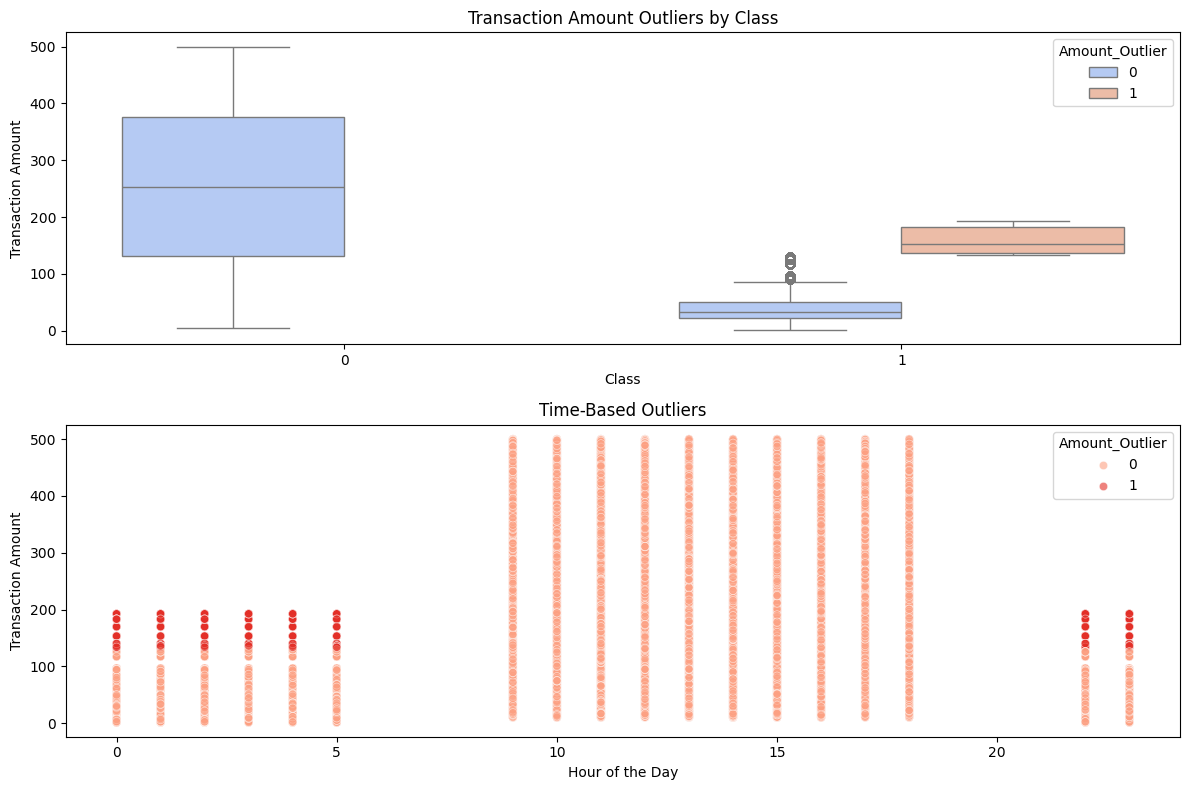

In [46]:
plt.figure(figsize=(12, 8))

# Boxplot for Transaction Amount Outliers
plt.subplot(2, 1, 1)
sns.boxplot(data=data, x='Class', y='Amount', hue='Amount_Outlier', palette='coolwarm')
plt.title('Transaction Amount Outliers by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')

# Scatter Plot for Time-Based Outliers
plt.subplot(2, 1, 2)
sns.scatterplot(data=data, x='Hour', y='Amount', hue='Amount_Outlier', palette='Reds', alpha=0.6)
plt.title('Time-Based Outliers')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

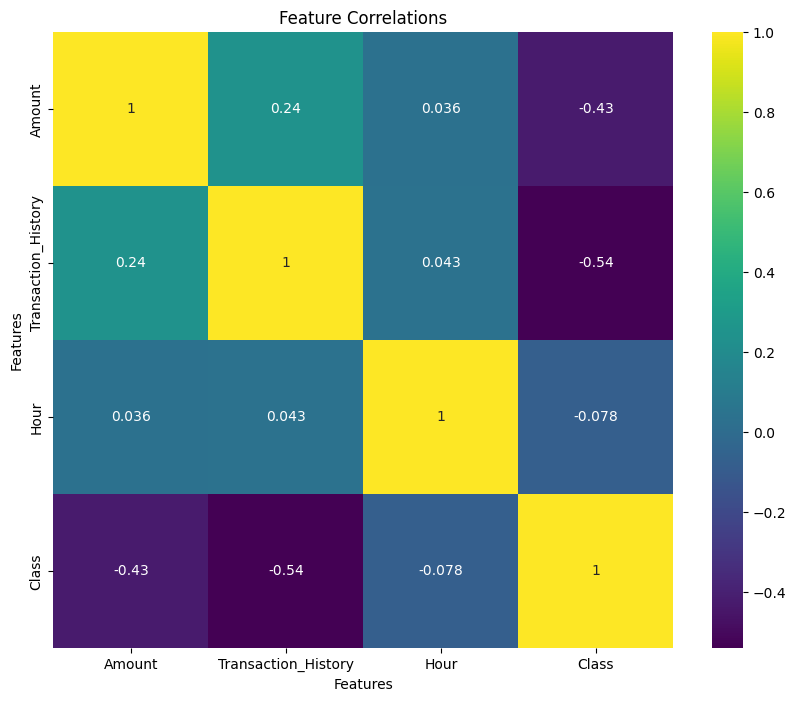

In [47]:
corr_matrix = data[['Amount','Transaction_History', 'Hour','Class']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", cbar=True)
plt.title("Feature Correlations")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

###############################################################################

In [1]:
import pandas as pd

data = pd.read_csv('creditcard_dataset.csv')

print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Overview:
     Time      Amount  Class Merchant_Type Transaction_Channel  \
0   79971  101.908163      0        travel              online   
1   55556  241.486077      0       grocery            in-store   
2  164832  460.900153      0        health              online   
3   38192  157.301678      0   electronics            in-store   
4  135453   66.656487      0        travel            in-store   

   Cardholder_Age Transaction_Location  Transaction_History  \
0              53        international           345.721081   
1              42        international           177.794562   
2              40        international           217.946929   
3              47        international           496.816517   
4              45        international           153.470059   

             Timestamp  Hour  
0  2023-01-01 12:43:00     9  
1  2023-01-01 13:16:00    10  
2  2023-01-01 19:34:00    10  
3  2023-01-01 13:36:00    13  
4  2023-01-01 10:10:00    18  

Dataset Info:
<clas

In [2]:
X = data.drop(columns=['Class', 'Timestamp', 'Time'])
y = data['Class']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (125913, 7)
Target Shape: (125913,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (100730, 7)
Testing Features Shape: (25183, 7)
Training Target Shape: (100730,)
Testing Target Shape: (25183,)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = ['Amount', 'Transaction_History']
categorical_features = ['Merchant_Type', 'Transaction_Channel', 'Transaction_Location']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Handle unseen categories
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),  # Scale numerical features
        ('cat', categorical_transformer, categorical_features)  # Encode categorical features
    ]
)

X_train_preprocessed = preprocessor.fit_transform(X_train)

print("Processed Training Data Shape:", X_train_preprocessed.shape)

Processed Training Data Shape: (100730, 10)


In [5]:
processed_columns = list(numerical_features) + list(
    preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
)

# Convert the preprocessed NumPy array to a DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=processed_columns)

# Display the first few rows of the preprocessed data
print("Preprocessed Training Data Sample:")
print(X_train_preprocessed_df.head())

Preprocessed Training Data Sample:
     Amount  Transaction_History  Merchant_Type_electronics  \
0  1.801073            -0.830680                        0.0   
1 -0.023098             0.261082                        0.0   
2 -1.147414            -1.388718                        0.0   
3 -1.351511            -1.077328                        0.0   
4 -1.363956            -1.483500                        0.0   

   Merchant_Type_grocery  Merchant_Type_health  Merchant_Type_travel  \
0                    0.0                   0.0                   1.0   
1                    0.0                   0.0                   1.0   
2                    1.0                   0.0                   0.0   
3                    1.0                   0.0                   0.0   
4                    1.0                   0.0                   0.0   

   Transaction_Channel_in-store  Transaction_Channel_online  \
0                           0.0                         1.0   
1                          

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', log_reg)          # Logistic Regression model
])

pipeline.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[22369    65]
 [   21  2728]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22434
           1       0.98      0.99      0.98      2749

    accuracy                           1.00     25183
   macro avg       0.99      0.99      0.99     25183
weighted avg       1.00      1.00      1.00     25183

